# 고급 그래프
    이변수 데이터 분포 pairplot

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_pair = titanic[ ['age', 'pclass', 'fare'] ]

In [5]:
titanic_pair.head()

,age,pclass,fare
0,22.0,3,7.2500
1,38.0,1,71.2833
2,26.0,3,7.9250
3,35.0,1,53.1000
4,35.0,3,8.0500


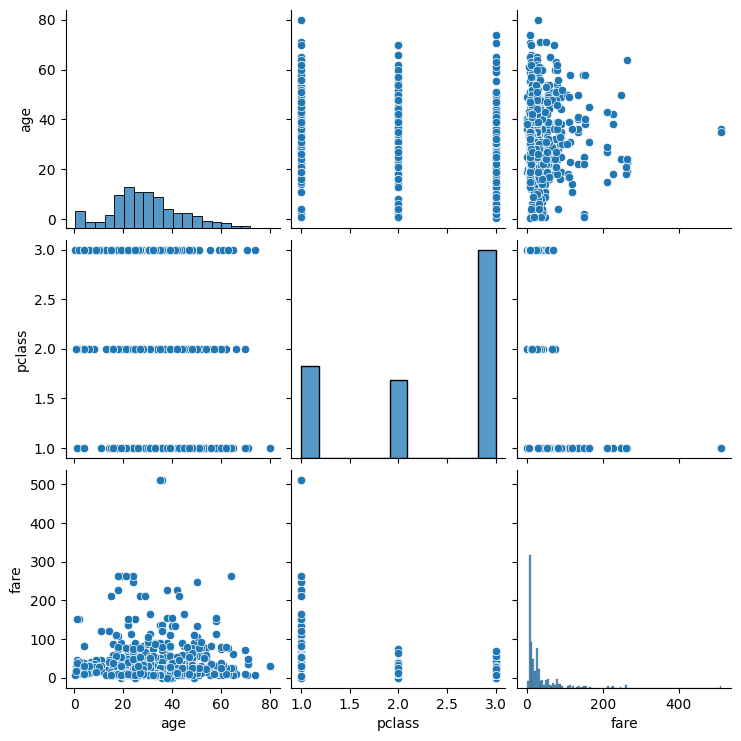

In [6]:
sns.pairplot(titanic_pair)

# Folium

In [13]:
!pip install folium

In [15]:
import folium

In [16]:
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

In [17]:
seoul_map

In [12]:
seoul_map.save('./seoul.html')

In [22]:
seoul_map1 = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='Stamen Terrain')
seoul_map2 = folium.Map(location=[37.55, 126.98], zoom_start=12, tiles='Stamen TONER')
seoul_map1.save('./seoul_map1.html')
seoul_map2.save('./seoul_map2.html')

In [25]:
import pandas as pd
df = pd.read_excel('./서울지역 대학교 위치.xlsx', index_col=0)
df.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [24]:
folium.Marker([37.592573, 127.046737], popup='KAIST 서울캠퍼스').add_to(seoul_map1)
seoul_map1.save('./seoul_map1.html')

In [36]:
for row in range(len(df)):
    lat = df.iloc[row,0]
    lng = df.iloc[row,1]
    title = df.iloc[row,:].name
    folium.Marker([lat, lng], popup=title).add_to(seoul_map1)
seoul_map1.save('./seoul_map1.html')
    

In [39]:
for name, lat, lng in (zip(df.index, df.위도, df.경도)):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map2)
seoul_map2.save('./seoul_map2.html')

# 대학교 위치정보를 circleMarker로 표시

In [42]:
univ = folium.Map(location=[37.55, 126.98], zoom_start=12)
for name, lat, lng in (zip(df.index, df.위도, df.경도)):
    folium.CircleMarker([lat, lng], radius=10, color='brown', fill=True, fill_color = 'coral', opacity=0.7, tooltip=name).add_to(univ)
univ.save('./univ.html')

### 지도영역에 단계구분도를 표시(Choropleth map)
    행정구역같이 지도상의 경계를 둘러싼 영역에 색을 칠하거나 음영등으로 정보를 나타내는 시각화 방법

In [43]:
import json

In [48]:
# 인구데이터를 가져오기
df = pd.read_excel('./경기도인구데이터.xlsx',index_col=0)
df.columns = df.columns.map(str)
df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [49]:
# 시군구 경계정보 json 파일 불러오기
geo_path = './경기도행정구역경계.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [50]:
geo_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [51]:
# 지도 만들기
g_map = folium.Map(location=[37.55, 126.98], zoom_start=9, tiles='Stamen Terrain')

In [54]:
year = '2007'
folium.Choropleth(geo_data = geo_data, 
                  data=df[year], 
                  columns=[df.index, df[year]], 
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, line_opacity=0.3, threshold_scale=[10000,100000,300000,500000,700000], key_on='feature.properties.name').add_to(g_map)
g_map.save('./gyounggi_map_'+year+'.html')

# 데이터 전처리
    기본전처리(pre-processing) NaN, outlier / 결측치, 이상치 처리(제거 또는 대체)
    데이터의 특성에 따라서 : 범주형 데이터로 분리, 연속형 데이터로 분리 - 기존 컬럼을 분석해서 새로운 컬럼을 생성
    상관관계와 같은 통계적으로 접근해서 최적의 데이터 셋을 만듦

In [55]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [59]:
# 누락된 데이터 확인
titanic['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [60]:
# 누락된 데이터 확인 
#isnull() true->null 결측치
#notnull() true->not null 결측치가 아닐때

In [63]:
# 모든 컬럼의 결측치 개수를 확인
titanic.isnull().sum()
# 모든 컬럼의 각 컬럼에 해당하는 결측치 비율
titanic.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [64]:
titanic.head().notnull().sum()

survived       5
pclass         5
sex            5
age            5
sibsp          5
parch          5
fare           5
embarked       5
class          5
who            5
adult_male     5
deck           2
embark_town    5
alive          5
alone          5
dtype: int64

<AxesSubplot: >

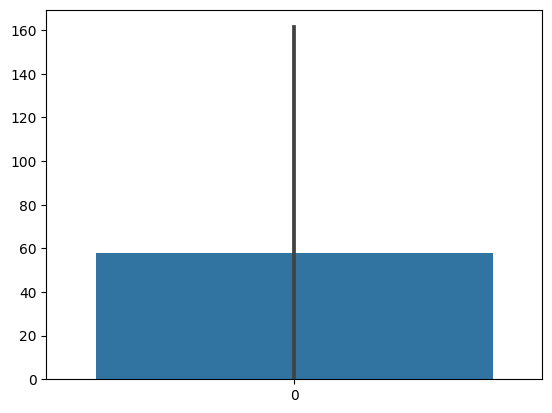

In [65]:
sns.barplot(data=titanic.isnull().sum())

In [68]:
# 누락 데이터 제거 NaN 값이 500개 이상인 열을 모두 삭제
df_titanic = titanic.dropna(axis=1, thresh=500)

In [70]:
# age가 177명정도 데이터가 없다 age컬럼의 데이터가 없는 row는 삭제한다
df_age = df_titanic.dropna(subset=['age'], axis=0)
len(df_age)

714

In [73]:
# 데이터 치환 - age를 평균을 구해서 치환
mean_age = df_titanic['age'].mean()

In [75]:
df_titanic['age'].fillna(mean_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [76]:
df_titanic['age'].isnull().sum()

177

In [78]:
(df_titanic.isnull().sum()>0).values

array([False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False])

In [79]:
df_titanic.columns[(df_titanic.isnull().sum()>0).values]

Index(['age', 'embarked', 'embark_town'], dtype='object')

In [82]:
# embark_town 승선도시 NaN을 대체
df_titanic[df_titanic['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [83]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [87]:
# 가장 많이 승선한 도시이름을 찾아서 대체
most_freq = df_titanic['embark_town'].value_counts().idxmax()

In [88]:
df_titanic['embark_town'].fillna(most_freq, inplace=True)

C:\Temp\ipykernel_33572\4115132171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['embark_town'].fillna(most_freq, inplace=True)


In [89]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [90]:
most_freq = df_titanic['embarked'].value_counts().idxmax()
df_titanic['embarked'].fillna(most_freq, inplace=True)

C:\Temp\ipykernel_33572\463361259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic['embarked'].fillna(most_freq, inplace=True)


In [91]:
df_titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [92]:
# 데이터를 처리할때 
# 1. 양이 많을 때 해당 컬럼은 무의미하다 dropna axis=1 해당 컬럼 제거
# 2. 양이 적을 때 과감하게 삭제 또는 대체
# 3. 대체: 이웃하는 데이터끼리 유사성이 많을 수 있음 또는 유사성을 찾을 수 있으면 해당 데이터로 교체
# 4. 수치형: 평균, 0 범주형은 빈도수가 많은 데이터로 교체

# 중복데이터 처리